In [2]:
##universal setting 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
from sklearn import preprocessing
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [3]:
# data location
read_location="C:/Selina/Class/(DS_MS)/Capstone/DataSet/"
save_location="C:/Selina/Class/(DS_MS)/Capstone/Result/"
#plot color setting (https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)
my_cmap=plt.cm.get_cmap("Pastel2")
#for geopandas setting
crs={'init': 'epsg:4326'}
#for ploting 
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
#load data
CV_SVM=pd.read_csv(save_location+"CrossValidation_SVM_linear.csv",index_col=0)
CV_XGBT=pd.read_csv(save_location+"CrossValidation_XGBT_3.csv",index_col=0)

In [4]:
y="mean_test_score"
x0=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'params', 'split0_test_score',
    'split1_test_score', 'split2_test_score', 'mean_test_score','std_test_score', 'rank_test_score']

SVM_para= [x for x in CV_SVM.columns if x not in x0]
x1=SVM_para.pop()
x2=SVM_para.pop()
x3=SVM_para.pop()
print(x1,x2,x3)

param_kernel param_gamma param_C


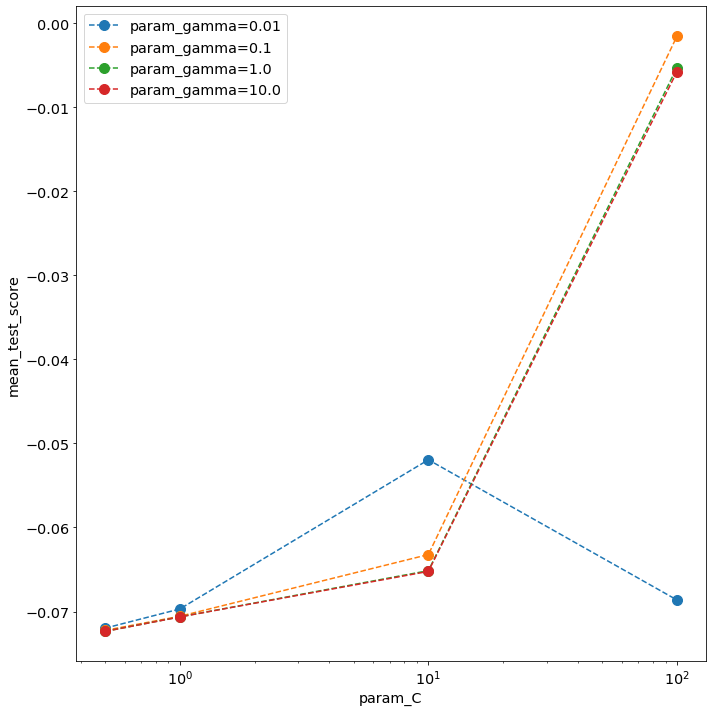

In [5]:
plt.figure("CV_SVM")
for i in CV_SVM[x2].unique():
    data_temp=CV_SVM[CV_SVM[x2]==i]
    plt.plot(data_temp[x3],data_temp[y],label=x2+"="+str(i),linestyle='dashed',marker=".",ms=20)
plt.xscale("log")
plt.ylabel(y)
plt.xlabel(x3)
plt.legend()
plt.tight_layout()
plt.savefig(save_location+"CV_SVR.png")
plt.show()

In [7]:
#XGBT plot
XGBT_para= [x for x in CV_XGBT.columns if x not in x0]
x1=XGBT_para.pop()
x2=XGBT_para.pop()
x3=XGBT_para.pop()
x4=XGBT_para.pop()
x5=XGBT_para.pop()
print(x1,x2,x3,x4,x5,XGBT_para)

param_reg_lambda param_max_depth param_gamma param_eta param_ n_estimators []


C:\Users\Selina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Selina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


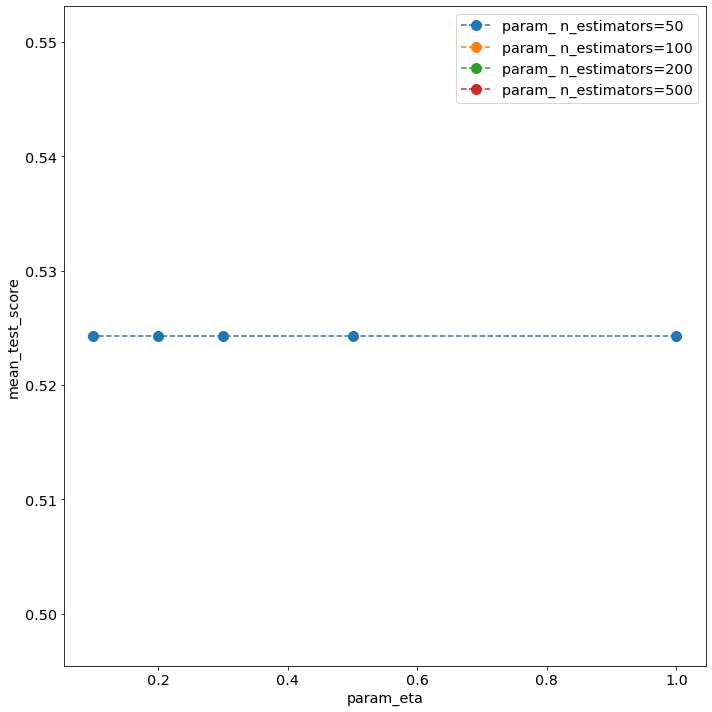

In [24]:
data_temp=CV_XGBT[CV_XGBT[x1]==1][CV_XGBT[x2]==7][CV_XGBT[x3]==0]

fig = plt.figure()
for i in data_temp[x5].unique():
    data_temp=data_temp[data_temp[x5]==i]
    plt.plot(data_temp[x4],data_temp[y],label=x5+"="+str(i),linestyle='dashed',marker=".",ms=20)
plt.ylabel(y)
plt.xlabel(x4)
plt.legend()
plt.tight_layout()
plt.savefig(save_location+"CV_XGBOOST_01.png")
plt.show()

C:\Users\Selina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Selina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Selina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
No handles with labels found to put in legend.


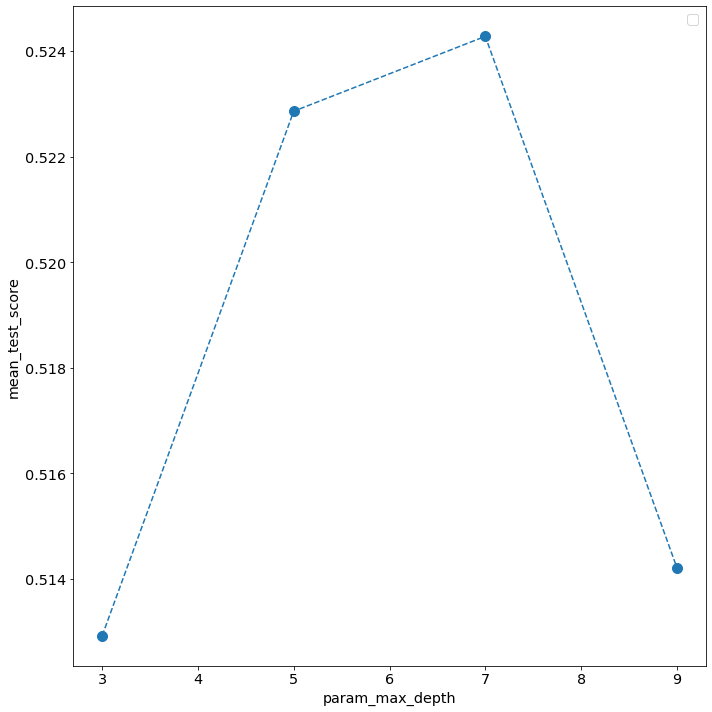

In [25]:
data_temp=CV_XGBT[CV_XGBT[x4]==0.5][CV_XGBT[x5]==200][CV_XGBT[x1]==1][CV_XGBT[x3]==0]

fig = plt.figure()
plt.plot(data_temp[x2],data_temp[y],linestyle='dashed',marker=".",ms=20)
plt.ylabel(y)
plt.xlabel(x2)
plt.legend()
plt.tight_layout()
plt.savefig(save_location+"CV_XGBOOST_02.png")
plt.show()

C:\Users\Selina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Selina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


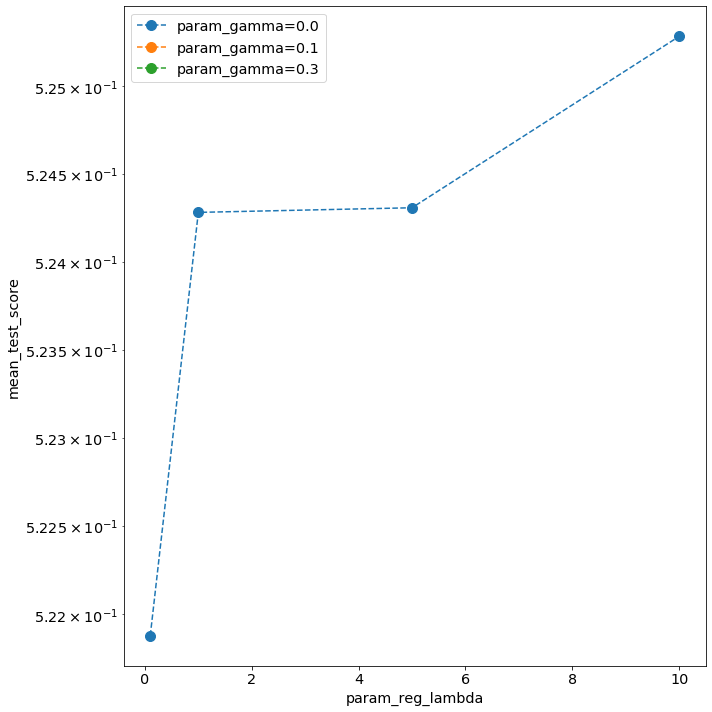

In [27]:
data_temp=CV_XGBT[CV_XGBT[x4]==0.5][CV_XGBT[x5]==200][CV_XGBT[x2]==7]

fig = plt.figure()
for i in data_temp[x3].unique():
    data_temp=data_temp[data_temp[x3]==i]
    plt.plot(data_temp[x1],data_temp[y],label=x3+"="+str(i),linestyle='dashed',marker=".",ms=20)
plt.yscale("log")
plt.ylabel(y)
plt.xlabel(x1)
plt.legend()
plt.tight_layout()
plt.savefig(save_location+"CV_XGBOOST_03.png")
plt.show()